In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key
api_f = "&appid="
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


In [4]:
record_num = 1
record_set = 1
weather_data_df = { "city": [],
                    "date": [],
                    "cloudiness":[],
                    "humidity":[],
                    "lat": [],
                    "lng": [],
                    "maxtemp": [],
                    "windspeed":[],
                               }
for city in cities:
    n_url = url + city + api_f + weather_api_key
    response = requests.get(n_url).json()
    try:
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        weather_data_df['city'].append(response['name'])        
        weather_data_df['cloudiness'].append(response['clouds']['all'])
        weather_data_df['date'].append(response['dt'])
        weather_data_df['humidity'].append(response['main']['humidity'])
        weather_data_df['lat'].append(response['coord']['lat'])
        weather_data_df['lng'].append(response['coord']['lon'])
        weather_data_df['maxtemp'].append(response['main']['temp_max'])
        weather_data_df['windspeed'].append(response['wind']['speed'])
        record_num += 1
    except(KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
    print(record_num)
print(('''
-----------------------------
Data Retrival Complete
-----------------------------'''))

Processing Weather Data for Record 1 of Set 1 | Sarangani
2
Processing Weather Data for Record 2 of Set 1 | Ilebo
3
Processing Weather Data for Record 3 of Set 1 | Nagtipunan
4
Processing Weather Data for Record 4 of Set 1 | Ushuaia
5
Processing Weather Data for Record 5 of Set 1 | Mataura
6
Processing Weather Data for Record 6 of Set 1 | Puerto Ayora
7
Processing Weather Data for Record 7 of Set 1 | Hermanus
8
Processing Weather Data for Record 8 of Set 1 | Esperance
9
Processing Weather Data for Record 9 of Set 1 | Khatanga
10
Processing Weather Data for Record 10 of Set 1 | Rikitea
11
Processing Weather Data for Record 11 of Set 1 | Araouane
12
Processing Weather Data for Record 12 of Set 1 | Aksarka
13
Processing Weather Data for Record 13 of Set 1 | Hilo
14
Processing Weather Data for Record 14 of Set 1 | Albany
15
Processing Weather Data for Record 15 of Set 1 | Egtved
16
City not found....Skipping............
16
Processing Weather Data for Record 16 of Set 1 | Linxia Chengguanzh

Processing Weather Data for Record 23 of Set 3 | Menongue
24
Processing Weather Data for Record 24 of Set 3 | Along
25
Processing Weather Data for Record 25 of Set 3 | Ribeira Grande
26
Processing Weather Data for Record 26 of Set 3 | Solnechnyy
27
Processing Weather Data for Record 27 of Set 3 | Truth or Consequences
28
Processing Weather Data for Record 28 of Set 3 | Upernavik
29
Processing Weather Data for Record 29 of Set 3 | Pālampur
30
Processing Weather Data for Record 30 of Set 3 | Hithadhoo
31
Processing Weather Data for Record 31 of Set 3 | Bunia
32
Processing Weather Data for Record 32 of Set 3 | Yar-Sale
33
Processing Weather Data for Record 33 of Set 3 | Dunedin
34
Processing Weather Data for Record 34 of Set 3 | Qaanaaq
35
Processing Weather Data for Record 35 of Set 3 | Santiago
36
Processing Weather Data for Record 36 of Set 3 | Bathsheba
37
Processing Weather Data for Record 37 of Set 3 | Ţahţā
38
Processing Weather Data for Record 38 of Set 3 | Ponta do Sol
39
Process

Processing Weather Data for Record 4 of Set 6 | Cabra
5
Processing Weather Data for Record 5 of Set 6 | Saint-Paul
6
Processing Weather Data for Record 6 of Set 6 | Dorāha
7
Processing Weather Data for Record 7 of Set 6 | Iwanai
8
Processing Weather Data for Record 8 of Set 6 | Kilindoni
9
Processing Weather Data for Record 9 of Set 6 | Kimbe
10
Processing Weather Data for Record 10 of Set 6 | Pilar
11
City not found....Skipping............
11
Processing Weather Data for Record 11 of Set 6 | Saurimo
12
Processing Weather Data for Record 12 of Set 6 | Ürümqi
13
Processing Weather Data for Record 13 of Set 6 | Skjervøy
14
Processing Weather Data for Record 14 of Set 6 | Charleville
15
Processing Weather Data for Record 15 of Set 6 | Kaka
16
Processing Weather Data for Record 16 of Set 6 | Faya
17
Processing Weather Data for Record 17 of Set 6 | Örnsköldsvik
18
Processing Weather Data for Record 18 of Set 6 | Yeppoon
19
Processing Weather Data for Record 19 of Set 6 | Pangody
20
Processin

City not found....Skipping............
35
Processing Weather Data for Record 35 of Set 8 | Pitimbu
36
Processing Weather Data for Record 36 of Set 8 | Rizhao
37
Processing Weather Data for Record 37 of Set 8 | Half Moon Bay
38
City not found....Skipping............
38
Processing Weather Data for Record 38 of Set 8 | Ancud
39
Processing Weather Data for Record 39 of Set 8 | Kabo
40
Processing Weather Data for Record 40 of Set 8 | Prigor
41
Processing Weather Data for Record 41 of Set 8 | Evensk
42
Processing Weather Data for Record 42 of Set 8 | Acapulco de Juárez
43
Processing Weather Data for Record 43 of Set 8 | Kavieng
44
Processing Weather Data for Record 44 of Set 8 | Haines Junction
45
Processing Weather Data for Record 45 of Set 8 | Altay
46
Processing Weather Data for Record 46 of Set 8 | Broken Hill
47
Processing Weather Data for Record 47 of Set 8 | Frolovo
48
Processing Weather Data for Record 48 of Set 8 | High Level
49
Processing Weather Data for Record 49 of Set 8 | Virgi

Processing Weather Data for Record 9 of Set 11 | Broome
10
Processing Weather Data for Record 10 of Set 11 | Bukachacha
11
Processing Weather Data for Record 11 of Set 11 | Nālūt
12
Processing Weather Data for Record 12 of Set 11 | Havre-St-Pierre
13
Processing Weather Data for Record 13 of Set 11 | Kokorevka
14
Processing Weather Data for Record 14 of Set 11 | Safford
15
Processing Weather Data for Record 15 of Set 11 | Santa Rosa
16
Processing Weather Data for Record 16 of Set 11 | Dali
17
Processing Weather Data for Record 17 of Set 11 | Nhulunbuy
18
City not found....Skipping............
18
Processing Weather Data for Record 18 of Set 11 | Tafalla
19
Processing Weather Data for Record 19 of Set 11 | Southbridge
20
Processing Weather Data for Record 20 of Set 11 | Lukovetskiy
21
Processing Weather Data for Record 21 of Set 11 | Carahue
22
Processing Weather Data for Record 22 of Set 11 | Henties Bay
23
Processing Weather Data for Record 23 of Set 11 | Mahabalipuram
24
Processing Wea

In [11]:
weather_df = pd.DataFrame(weather_data_df)
weather_df.to_csv("weather_df.csv")

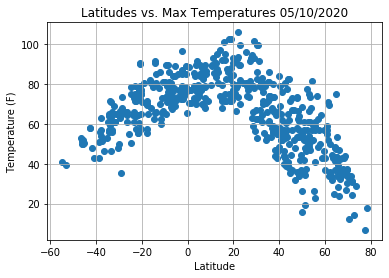

In [12]:
plt.scatter(weather_df["lat"], weather_df["maxtemp"], marker="o")
plt.title(f'Latitudes vs. Max Temperatures {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Max Temperatures.png")

# Show plot
plt.show()

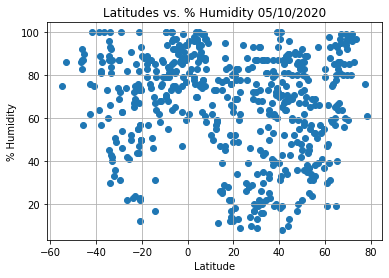

In [13]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")
plt.title(f'Latitudes vs. % Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. % Humidity.png")

# Show plot
plt.show()

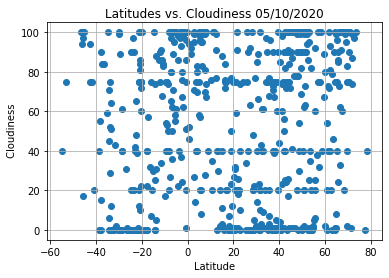

In [14]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o")
plt.title(f'Latitudes vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel(" Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Cloudiness.png")

# Show plot
plt.show()

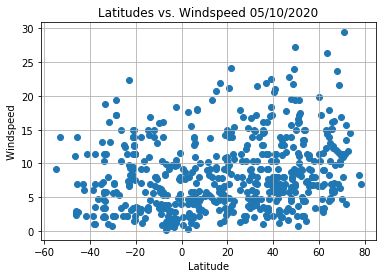

In [15]:
plt.scatter(weather_df["lat"], weather_df["windspeed"], marker="o")
plt.title(f'Latitudes vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel(" Windspeed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes vs. Windspeed.png")

# Show plot
plt.show()

In [16]:
northern_df = weather_df.loc[(weather_df["lat"]) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["lat"]).astype(float) < 0, :]

Linear Regression Equation: y = -0.77x + 92.03
The r-squared is: -0.7751708613370953
The r-squared value displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


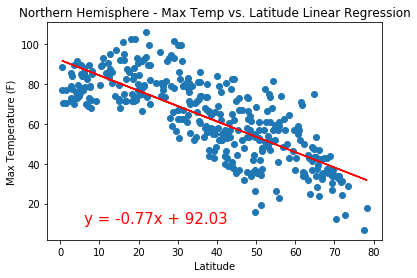

<Figure size 432x288 with 0 Axes>

In [17]:
x_val = northern_df["lat"]
y_val = northern_df["maxtemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The r-squared value displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Northern Hem vs. Max Temp LinReg.png")

Linear Regression Equation: y = 0.67x + 82.24
The r-squared is: 0.7366147868518003
The r-squared value displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


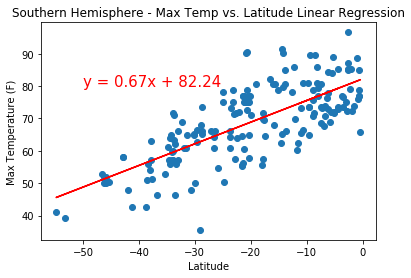

<Figure size 432x288 with 0 Axes>

In [18]:
x_val = southern_df["lat"]
y_val = southern_df["maxtemp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50, 80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The r-squared value displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig("Southern Hem vs. Max Temp LinReg.png")

Linear Regression Equation: y = 0.01x + 62.93
The r-squared is: 0.009711859651701198
There is not much correlation in the data.


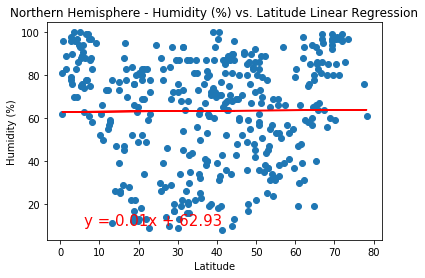

In [19]:
x_val = northern_df["lat"]
y_val = northern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.24x + 77.39
The r-squared is: 0.15884096976981088
There is not much correlation in the data.


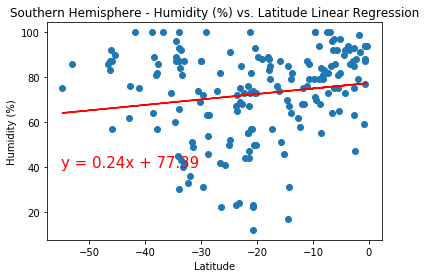

In [20]:
x_val = southern_df["lat"]
y_val = southern_df["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.13x + 46.49
The r-squared is: 0.06883288102382643
There is not much correlation in the data.


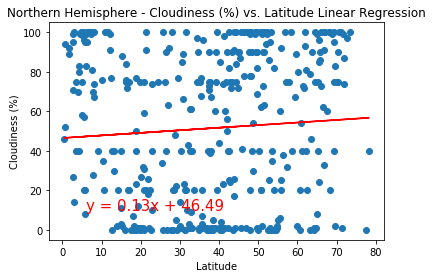

In [21]:
x_val = northern_df["lat"]
y_val = northern_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.58x + 62.67
The r-squared is: 0.20971558479222654
There is not much correlation in the data.


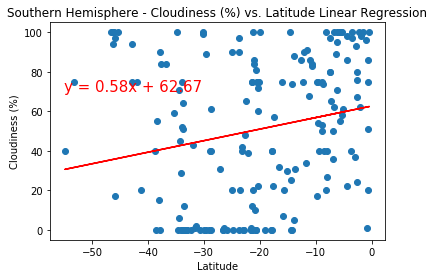

In [22]:
x_val = southern_df["lat"]
y_val = southern_df["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = 0.06x + 6.82
The r-squared is: 0.21482014615794096
There is not much correlation in the data.


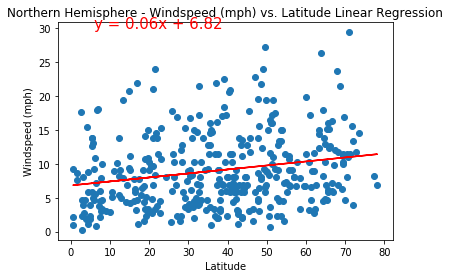

In [23]:
x_val = northern_df["lat"]
y_val = northern_df["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()

Linear Regression Equation: y = -0.04x + 6.39
The r-squared is: -0.0957700907274764
There is not much correlation in the data.


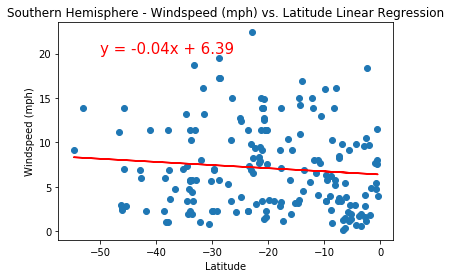

In [24]:
x_val = southern_df["lat"]
y_val = southern_df["windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Linear Regression Equation: {line_eq}")
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is not much correlation in the data.")
plt.show()